# Example: Regression with `QNNRegressor`

In this example we show how to train the `QNNRegressor` to fit a logarithm. We will also use this demonstrator to show what happens if a QNN, that was trained on a noiseless simulator is executed on a noisy simulator.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import IsingHamiltonian
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import SLSQP, Adam, SPSA

We will use Qiskit's `StatevectorSimulator` for trainning.

In [2]:
executor = Executor("statevector_simulator")

## `QNNRegressor` Setup

We start by defining a parameterized quantum circuit (PQC)

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


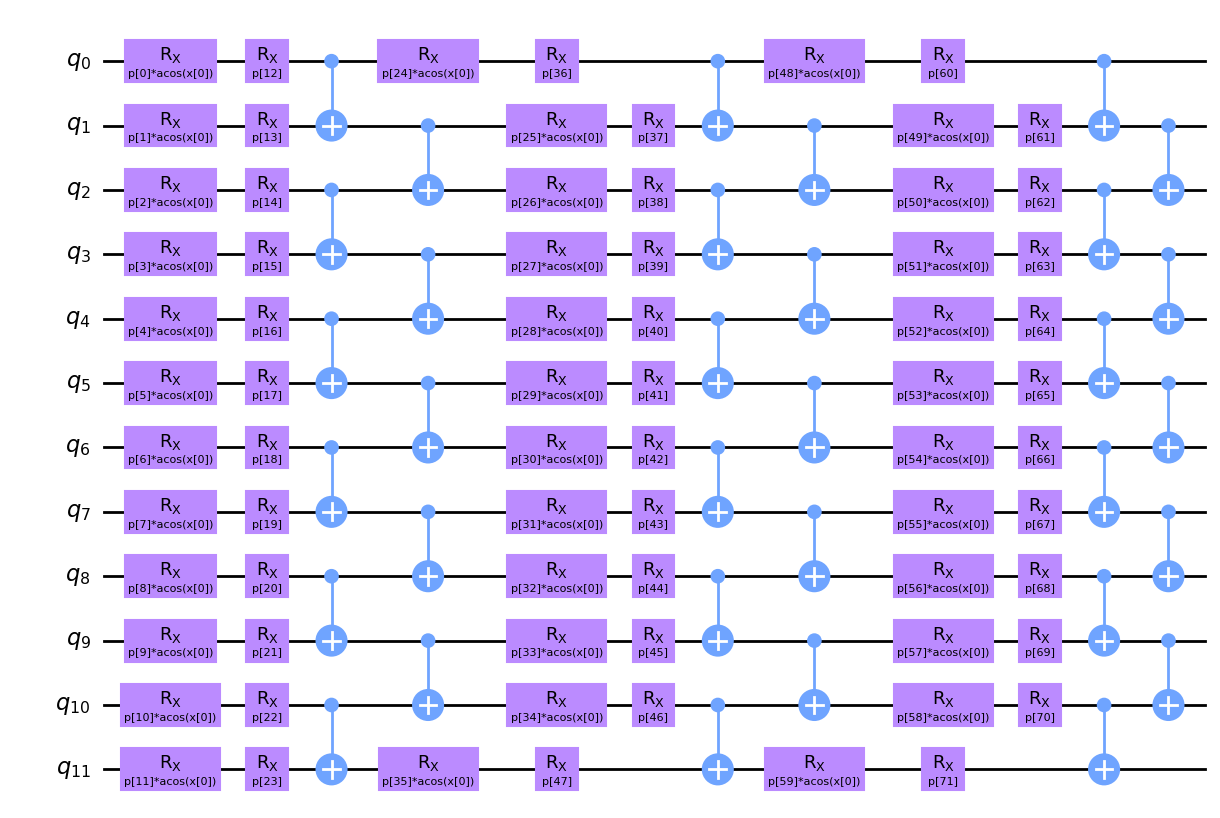

In [3]:
nqubits = 4
number_of_layers = 3

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

We also need an observable

In [4]:
ising_op = IsingHamiltonian(nqubits, I="S", Z="S", ZZ="S")
print(ising_op)

SparsePauliOp(['IIIIIIIIIIII', 'IIIIIIIIIIIZ', 'IIIIIIIIIIZI', 'IIIIIIIIIZII', 'IIIIIIIIZIII', 'IIIIIIIZIIII', 'IIIIIIZIIIII', 'IIIIIZIIIIII', 'IIIIZIIIIIII', 'IIIZIIIIIIII', 'IIZIIIIIIIII', 'IZIIIIIIIIII', 'ZIIIIIIIIIII', 'IIIIIIIIIIZZ', 'IIIIIIIIIZIZ', 'IIIIIIIIIZZI', 'IIIIIIIIZIIZ', 'IIIIIIIIZIZI', 'IIIIIIIIZZII', 'IIIIIIIZIIIZ', 'IIIIIIIZIIZI', 'IIIIIIIZIZII', 'IIIIIIIZZIII', 'IIIIIIZIIIIZ', 'IIIIIIZIIIZI', 'IIIIIIZIIZII', 'IIIIIIZIZIII', 'IIIIIIZZIIII', 'IIIIIZIIIIIZ', 'IIIIIZIIIIZI', 'IIIIIZIIIZII', 'IIIIIZIIZIII', 'IIIIIZIZIIII', 'IIIIIZZIIIII', 'IIIIZIIIIIIZ', 'IIIIZIIIIIZI', 'IIIIZIIIIZII', 'IIIIZIIIZIII', 'IIIIZIIZIIII', 'IIIIZIZIIIII', 'IIIIZZIIIIII', 'IIIZIIIIIIIZ', 'IIIZIIIIIIZI', 'IIIZIIIIIZII', 'IIIZIIIIZIII', 'IIIZIIIZIIII', 'IIIZIIZIIIII', 'IIIZIZIIIIII', 'IIIZZIIIIIII', 'IIZIIIIIIIIZ', 'IIZIIIIIIIZI', 'IIZIIIIIIZII', 'IIZIIIIIZIII', 'IIZIIIIZIIII', 'IIZIIIZIIIII', 'IIZIIZIIIIII', 'IIZIZIIIIIII', 'IIZZIIIIIIII', 'IZIIIIIIIIIZ', 'IZIIIIIIIIZI', 'IZIIIIIIIZII', 'IZIIIIII

Now we can create the `QNNRegressor` with the PQC and cost operator. We also specify `SquaredLoss` and `SLSQP` as the loss function and optimizer respectively. Finally we specify random initial parameters for both, the PQC and cost operator.

In [5]:
np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.random.rand(ising_op.num_parameters)

reg = QNNRegressor(pqc, ising_op, executor, SquaredLoss(), SLSQP(), param_ini, param_op_ini, caching=False)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_sing

## Training

Now we are ready to train the model to fit the logarithm funciton

In [6]:
x_space = np.arange(0.1, 0.9, 0.1)
ref_values = np.log(x_space)

reg.fit(x_space, ref_values)

fit:  85%|████████▌ | 85/100 [03:44<00:38,  2.57s/it]

## Evaluation

Let's check the trained parameters of the PQC and operator

In [7]:
print("Result PQC params:", reg.param)
print("Result operator params:", reg.param_op)

Result PQC params: [ 1.21474562  0.35233457  0.73508093  2.03721118  1.51626116 -0.18616112
  0.30865933  1.17279916  1.46297976  0.70598268  0.01467325  0.24276582
  0.55161976  1.17923516 -0.0850876   0.27551396  0.01885859 -0.49420954
 -0.01442901  0.20081075  1.38982625  0.47688026  0.26754404  0.97980724
 -0.15229152 -1.25507155  0.89130491  0.85737381 -0.50073067  1.12561495
  0.84551339  0.16637338  1.2145145  -0.55540552  0.43446889  0.8998905
  0.03875201 -0.29425426  0.75203016 -0.01483563  0.26203437  0.82592464
  0.75889168  0.26833528  0.47146792 -0.74753914  0.23139783  0.66657368
  0.58575403  0.01962741  0.40405033  1.46973731 -0.42389387 -0.07243773
  0.07037419  0.34115655  0.98703894  0.49423088  0.21729565  0.5132016
  1.67668096 -0.4647256   0.33984064  0.47680056  0.11448129  0.01897758
  0.42905984  0.80727711  0.70076275  0.45960832  0.44719436  0.16881484]
Result operator params: [-1.93826427 -2.11722536 -0.70750348]


Also let's plot the predicted function vs. the actual logarithm function

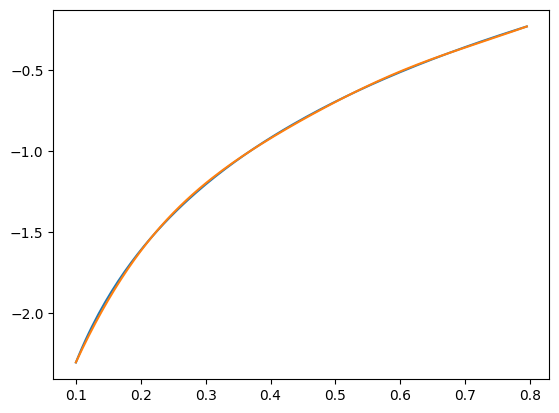

In [8]:
x = np.arange(np.min(x_space), np.max(x_space), 0.005)
y = reg.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

Let's also plot the error of the QNN.

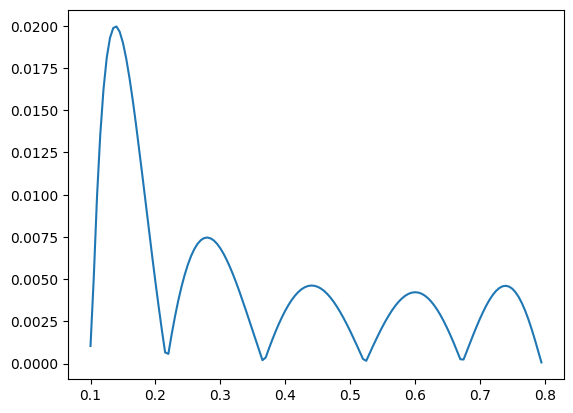

In [9]:
plt.plot(x, np.abs(y - np.log(x)))

## Evaluation on noisy simulator

Finally let's evaluate the trained `QNNRegressor` on Qiskit's `QasmSimulator`.

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_sing

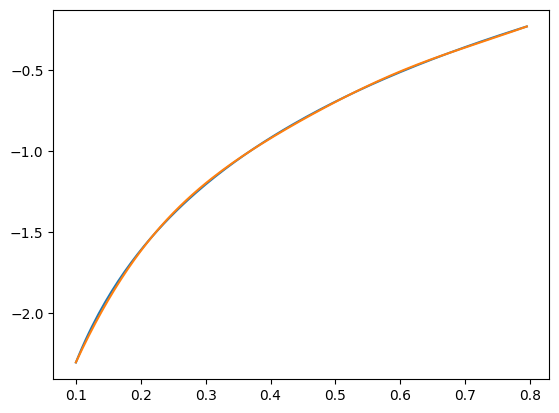

In [10]:
qasm = Executor("qasm_simulator")
qnn_qasm = QNNRegressor(pqc, ising_op, qasm, SquaredLoss, SLSQP(), reg.param, reg.param_op)
qnn_qasm._is_fitted = True
y = qnn_qasm.predict(x)
plt.plot(x, np.log(x))
plt.plot(x, y)

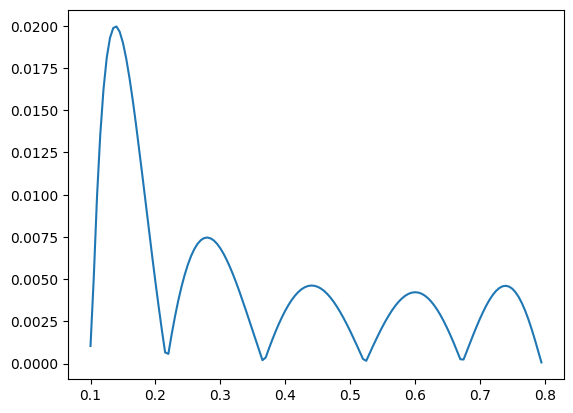

In [11]:
plt.plot(x, np.abs(y - np.log(x)))

We see, that the model is now subject to noise.